<a href="https://colab.research.google.com/github/vbipin/aip/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#########
#Work in progress. Just a backup
#########

In [ ]:
#In this we are exploring the decision tree algorithm
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Some util functions
from collections import Counter
def entropy( P ) :    
    #make sure that the incoming is a probability dist
    assert( abs(sum(P) - 1) < 0.0001 ) #sum(P) must be 1; sometimes because of float values it need not be exactly 1
    
    sum_all = 0
    for p in P :
        sum_all += -p * np.log2(p) #entropy is the sum of -p*log(p)
    
    return sum_all

def p_from_count( n_count ) :
    #print(n_count)
    N = sum(n_count)
    return [i/N for i in n_count]

def p_from_n_items( n_items ) :
    """count the items and build the probability distribution"""
    c = Counter(n_items)
    return p_from_count([c[i] for i in sorted(c.keys())])

def p_dict_from_n_items( n_items ) :
    """return a dict of {class: probability, ...}"""
    c = Counter(n_items)
    N = sum(c.values())
    p_dict = {label:count/N for label,count in c.items() }
    return p_dict

def entropy_from_n_items( n_items ) :
    """entropy form a list like [0,0,1,0,2,2]"""
    return entropy( p_from_n_items( n_items ) )


def data_split( X, Y, index_list ) :
    """Returns new X,Y at the indexs"""
    return X[index_list], Y[index_list] #worls only with numpy arrays



In [3]:
#we split a continuous variable according to a value in to left and right trees
#left branch is < 

def split_continuous_feature( X, feature_index, split_value ) :
    left_index = []
    right_index = []
    for i,x in enumerate(X) :
        if x[ feature_index ] < split_value :
            left_index.append(i) #we just store the index of the data points
        else :
            right_index.append(i)
    return left_index, right_index

In [4]:
#information gain

def information_gain( parent, child_list ) :
    """ parent is the list of y values
        child_list is the list of y values for each child node
    """
    parent_entropy = entropy_from_n_items(parent)
    #for expectation we need each child probability
    child_probability = [ len(c)/len(parent)      for c in child_list]
    child_entropy     = [ entropy_from_n_items(c) for c in child_list]
    children_expected_entropy = sum( [child_probability[i] * child_entropy[i] for i in range(len(child_list)) ] )
    
    return parent_entropy - children_expected_entropy

In [6]:
X = np.array([ 
    [1,1,3], 
    [2,1,5],
    [1,2,5],
    [3,1,7],
    [2,2.5,6],
    [3,3,2],
])
Y = np.array([1,1,1,1,0,0])

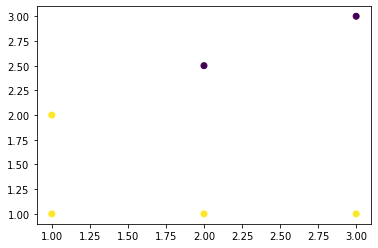

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [8]:
l_index,r_index =split_continuous_feature(X, feature_index=1, split_value=2.2)
L = Y[l_index]
R = Y[r_index]
information_gain(Y,[L,R])

0.9182958340544896

In [9]:
########################################################################

In [11]:
def find_IG_of_all_splits(X, Y, feature_index) :
    """returns the IG of all the splits"""
    ig_list = []
    for split_value in X[:,feature_index] : #we split on all the values of this feature
        l_index,r_index =split_continuous_feature(X, feature_index, split_value)
        L = Y[l_index]
        R = Y[r_index]
        if len(L) and len(R) :
            ig_list.append( information_gain(Y,[L,R]) )
        else :
            if len(L) :
                ig_list.append( information_gain(Y,[L]) )
            else :
                ig_list.append( information_gain(Y,[R]) ) 
    return ig_list

In [12]:
def find_best_split(X,Y) :
    a = []
    for feature_index in range(len(X[0])) :
        ig = find_IG_of_all_splits(X,Y,feature_index)
        max_ig = max(ig)
        max_ig_index = ig.index(max_ig)
        split_value = X[:,feature_index][max_ig_index]
        a.append((max_ig,feature_index,split_value))

    return sorted(a)

In [13]:
#Tree node
class node :
    def __init__(self, feature_index, split_value, p_dict) :
        self.feature_index = feature_index
        self.split_value   = split_value
        self.p_dict        = p_dict # { class: probability }
        self.L = None  # < split_value
        self.R = None  # >= split_value

In [14]:
def build_decision_tree( PX, PY, depth) :
    if depth <= 0 :
        return None
   
    _,f,v = find_best_split(PX,PY)[-1]
    p = p_dict_from_n_items( PY )
    tree = node( f, v, p )
    
    if len(p.keys()) <= 1 :
        return tree #we dont need to split this node
        
    l_index,r_index =split_continuous_feature(PX, feature_index=f, split_value=v)
    if len(l_index) > 0 :
        LX, LY = data_split(PX,PY,l_index)
        tree.L = build_decision_tree( LX, LY, depth-1 )
    
    if len(r_index) > 0 :   
        RX, RY = data_split(PX,PY,r_index)
        tree.R = build_decision_tree( RX, RY, depth-1 )
    
    return tree

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


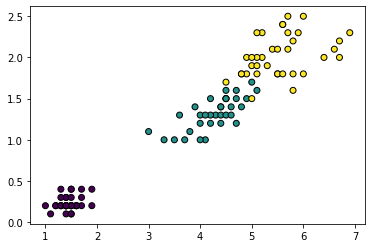

In [10]:
#############################################
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()

print(iris.data.shape)
print(iris.feature_names)
print(iris.target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3) # 70% training and 30% test

#X = iris.data
#Y = iris.target

X=X_train
Y=y_train

plt.scatter(X[:, 2], X[:, 3],
               c=Y.astype(np.float), edgecolor='k')

In [15]:
tree = build_decision_tree( X, Y, 4)

In [ ]:
#Work in progress. Just a backup